In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 전처리

In [2]:
optimal_gastro = pd.read_csv('Optimal_target_with_92_Q3_2점.csv')
real_gastro = pd.read_csv('Real_target_full_time.csv')
feature = pd.read_csv('imputed features_final.csv')

In [3]:
optimal_gastro.drop(columns='Unnamed: 0', inplace=True)
real_gastro.drop(columns='Unnamed: 0', inplace=True)
feature.drop(columns='Unnamed: 0', inplace=True)

In [4]:
feature = feature.merge(optimal_gastro, on='SubjectID', how='inner')
feature = feature.merge(real_gastro, on='SubjectID', how='inner')
feature

,SubjectID,Age,Gender,diag_delta,onset_delta,onset_site,diag_minus_onset,fvc_slope,fvc_mean,mean_alsfrs_total,...,slope_Q7_Turning_in_Bed,slope_Q8_Walking,slope_Q9_Climbing_Stairs,slope_Q10_Respiratory,slope_Bulbar,slope_motor,time_opt,status_opt,time_real,status_real
0,329.0,38.0,0.0,-1068.0,-1706.0,0.0,638.0,0.048171,101.250000,27.900000,...,0.013889,0.000000,0.013889,0.000000,0.000000,0.041667,274,0,274,0
1,348.0,52.0,0.0,-302.0,-501.0,0.0,199.0,-0.418109,97.421687,30.250000,...,0.016393,0.000000,0.000000,0.000000,0.000000,-0.016393,401,0,401,0
2,708.0,46.0,1.0,-986.0,-1070.0,1.0,84.0,-0.061928,51.000000,32.250000,...,0.000000,0.000000,0.000000,-0.010989,-0.010989,0.010989,35,1,231,0
3,2492.0,63.0,1.0,-209.0,-365.0,0.0,156.0,-0.235294,114.000000,30.000000,...,0.029412,0.000000,0.000000,0.000000,0.000000,0.000000,401,0,401,0
4,3971.0,55.0,0.0,-378.0,-763.0,0.0,385.0,-0.142857,86.000000,30.000000,...,0.071429,0.000000,0.000000,0.000000,0.000000,0.000000,378,0,378,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2888,998542.0,70.0,1.0,-73.0,-287.0,0.0,214.0,0.000000,85.000000,27.500000,...,0.000000,0.000000,0.000000,-0.125000,0.000000,0.000000,8,0,8,0
2889,998756.0,64.0,1.0,-241.0,-612.0,1.0,371.0,-0.255102,73.333333,29.333333,...,0.017544,0.000000,0.000000,0.000000,0.000000,0.000000,64,0,64,0
2890,999166.0,60.0,1.0,-49.0,-999.0,1.0,950.0,-0.333333,75.000000,35.000000,...,-0.008895,-0.025678,-0.036810,-0.002018,-0.004339,-0.018044,390,0,390,0
2891,999880.0,51.0,1.0,-2105.0,-2865.0,0.0,760.0,-0.079112,50.250000,24.200000,...,0.028571,0.000000,0.000000,0.000000,0.000000,0.014286,266,0,266,0


In [5]:
feature1 = feature.copy()
feature1 = feature1[(feature1['status_opt']== 1)]
feature1 = feature1[(feature1['status_real']== 1)]
feature1['real_minus_optimal_gas_time'] = feature1['time_real']-feature1['time_opt']
feature1.describe()

,SubjectID,Age,Gender,diag_delta,onset_delta,onset_site,diag_minus_onset,fvc_slope,fvc_mean,mean_alsfrs_total,...,slope_Q8_Walking,slope_Q9_Climbing_Stairs,slope_Q10_Respiratory,slope_Bulbar,slope_motor,time_opt,status_opt,time_real,status_real,real_minus_optimal_gas_time
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,...,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.0,367.000000,367.0,367.000000
mean,487938.746594,57.068120,0.553134,-220.021798,-505.122616,0.365123,285.100817,-0.136998,76.179350,27.625840,...,-0.002985,-0.005137,-0.001002,-0.008376,-0.021355,184.125341,1.0,235.193460,1.0,51.068120
std,298427.296120,11.234619,0.497848,198.412014,333.263870,0.482122,239.918937,0.316785,18.050897,6.084945,...,0.021412,0.025748,0.023303,0.028576,0.068226,117.856403,0.0,112.127139,0.0,123.751705
min,6786.000000,24.000000,0.000000,-1566.000000,-4274.000000,0.000000,-199.000000,-1.500000,15.037550,10.000000,...,-0.111111,-0.125000,-0.076923,-0.153846,-0.250000,7.000000,1.0,1.000000,1.0,-734.000000
25%,237508.000000,48.500000,0.000000,-302.500000,-611.000000,0.000000,143.000000,-0.294336,64.333333,23.250000,...,0.000000,-0.012423,0.000000,-0.015873,-0.044531,94.000000,1.0,155.500000,1.0,0.000000
50%,483798.000000,59.000000,1.000000,-165.000000,-446.000000,0.000000,236.000000,-0.125659,75.000000,28.666667,...,0.000000,0.000000,0.000000,0.000000,-0.017241,167.000000,1.0,238.000000,1.0,36.000000
75%,748194.500000,65.000000,1.000000,-83.000000,-302.000000,1.000000,355.500000,0.004235,88.500000,32.450000,...,0.000000,0.000000,0.000000,0.000000,0.000000,261.000000,1.0,311.000000,1.0,113.500000
max,996711.000000,82.000000,1.000000,-1.000000,-84.000000,1.000000,2708.000000,1.375000,133.000000,39.000000,...,0.333333,0.333333,0.333333,0.333333,1.000000,736.000000,1.0,530.000000,1.0,397.000000


<AxesSubplot:xlabel='real_minus_optimal_gas_time', ylabel='Count'>

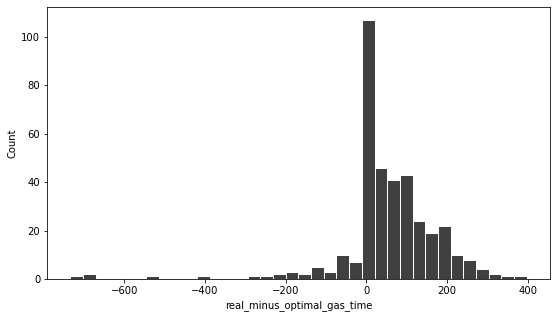

In [6]:
plt.figure(figsize=(9,5))
sns.histplot(x=feature1['real_minus_optimal_gas_time'], color='k', edgecolor='w')

In [7]:
surv = pd.read_csv('survival.csv')

In [8]:
zero_list = list(feature1[feature1['real_minus_optimal_gas_time']==0]['SubjectID'])
print(len(zero_list))

105


In [9]:
feature_early =  feature1[(feature1['real_minus_optimal_gas_time']< 0) ] 
feature_medium =  feature1[(feature1['real_minus_optimal_gas_time']== 0)]
feature_late =  feature1[(feature1['real_minus_optimal_gas_time']>0) ]

early_list = list(feature_early['SubjectID'])
medium_list = list(feature_medium['SubjectID'])
late_list = list(feature_late['SubjectID'])

In [10]:
feature2 = feature.copy()
feature2 = feature2[(feature2['status_opt'] == 1) & (feature2['status_real'] == 0)]
add_late_list = list(feature2['SubjectID'])+late_list
feature3 = feature.copy()
feature3 = feature3[(feature3['status_opt'] == 0) & (feature3['status_real'] == 1)]
add_early_list = list(feature3['SubjectID'])+early_list
print(len(add_late_list))
print(len(add_early_list))
print(len(early_list))
print(len(medium_list))
print(len(late_list))

756
77
39
105
223


In [11]:
feature_add_early =  feature[feature['SubjectID'].isin(add_early_list)]
feature_add_late =  feature[feature['SubjectID'].isin(add_late_list)]

In [12]:
surv_early = surv.copy()
surv_medium = surv.copy()
surv_late = surv.copy()

surv_early.query("SubjectID == {0}".format(early_list), inplace=True)
surv_medium.query("SubjectID == {0}".format(medium_list), inplace=True)
surv_late.query("SubjectID == {0}".format(late_list), inplace=True)

### Early vs Late : Comparing survival curves

<AxesSubplot:xlabel='time (days)', ylabel='survival function, $\\hat{S}(t)$'>

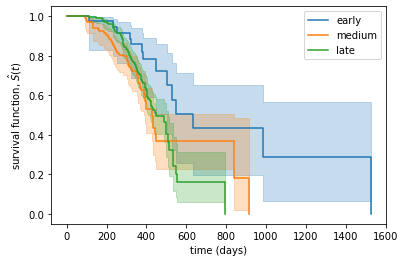

In [13]:
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test

kmf = KaplanMeierFitter()
kmf.fit(surv_early["time_event"], surv_early["status"], label="early")
ax_kmf = kmf.plot()
kmf.fit(surv_medium["time_event"], surv_medium["status"], label="medium")
ax_kmf = kmf.plot(ax=ax_kmf)
kmf.fit(surv_late["time_event"], surv_late["status"], label="late")
ax_kmf = kmf.plot(ax=ax_kmf)

ax_kmf.set_xlabel('time (days)')
ax_kmf.set_ylabel('survival function, $\hat{S}(t)$')
ax_kmf

### Adding (0,1) and (1,0) data

In [14]:
surv_early = surv.copy()
surv_medium = surv.copy()
surv_late = surv.copy()

surv_early.query("SubjectID == {0}".format(add_early_list), inplace=True)
surv_medium.query("SubjectID == {0}".format(medium_list), inplace=True)
surv_late.query("SubjectID == {0}".format(add_late_list), inplace=True)

<AxesSubplot:xlabel='time (days)', ylabel='survival function, $\\hat{S}(t)$'>

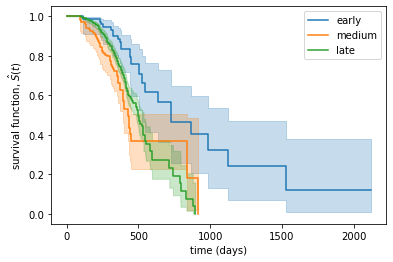

In [15]:
kmf = KaplanMeierFitter()
kmf.fit(surv_early["time_event"], surv_early["status"], label="early")
ax_kmf = kmf.plot()
kmf.fit(surv_medium["time_event"], surv_medium["status"], label="medium")
ax_kmf = kmf.plot(ax=ax_kmf)
kmf.fit(surv_late["time_event"], surv_late["status"], label="late")
ax_kmf = kmf.plot(ax=ax_kmf)

ax_kmf.set_xlabel('time (days)')
ax_kmf.set_ylabel('survival function, $\hat{S}(t)$')
ax_kmf

### 생존 편향 검토

1. 삼킴장애 진행속도로 분류한 환자군에서 Early, Late 비율 확인

In [16]:
feature_early_slow = feature_early[feature_early['slope_Q3_Swallowing']>0]
feature_early_intermediate = feature_early[feature_early['slope_Q3_Swallowing']==0]
feature_early_fast = feature_early[feature_early['slope_Q3_Swallowing']<0]
print("Early, slow : "+ str(len(feature_early_slow))+ "("+ str(round((100*len(feature_early_slow)/len(feature_early)),2))+"%)")
print("Early, intermediate : "+ str(len(feature_early_intermediate))+ "("+ str(round((100*len(feature_early_intermediate)/len(feature_early)),2))+"%)")
print("Early, fast : "+ str(len(feature_early_fast))+ "("+ str(round((100*len(feature_early_fast)/len(feature_early)),2))+"%)")

Early, slow : 4(10.26%)
Early, intermediate : 27(69.23%)
Early, fast : 8(20.51%)


In [17]:
feature_add_early_slow = feature_add_early[feature_add_early['slope_Q3_Swallowing']>0]
feature_add_early_intermediate = feature_add_early[feature_add_early['slope_Q3_Swallowing']==0]
feature_add_early_fast = feature_add_early[feature_add_early['slope_Q3_Swallowing']<0]
print("add_Early, slow : "+ str(len(feature_add_early_slow))+ "("+ str(round((100*len(feature_add_early_slow)/len(feature_add_early)),2))+"%)")
print("add_Early, intermediate : "+ str(len(feature_add_early_intermediate))+ "("+ str(round((100*len(feature_add_early_intermediate)/len(feature_add_early)),2))+"%)")
print("add_Early, fast : "+ str(len(feature_add_early_fast))+ "("+ str(round((100*len(feature_add_early_fast)/len(feature_add_early)),2))+"%)")

add_Early, slow : 4(5.19%)
add_Early, intermediate : 57(74.03%)
add_Early, fast : 16(20.78%)


In [18]:
feature_medium_slow = feature_medium[feature_medium['slope_Q3_Swallowing']>0]
feature_medium_intermediate = feature_medium[feature_medium['slope_Q3_Swallowing']==0]
feature_medium_fast = feature_medium[feature_medium['slope_Q3_Swallowing']<0]
print("Medium, slow : "+ str(len(feature_medium_slow))+ "("+ str(round((100*len(feature_medium_slow)/len(feature_medium)),2))+"%)")
print("Medium, intermediate : "+ str(len(feature_medium_intermediate))+ "("+ str(round((100*len(feature_medium_intermediate)/len(feature_medium)),2))+"%)")
print("Medium, fast : "+ str(len(feature_medium_fast))+ "("+ str(round((100*len(feature_medium_fast)/len(feature_medium)),2))+"%)")

Medium, slow : 8(7.62%)
Medium, intermediate : 80(76.19%)
Medium, fast : 17(16.19%)


In [19]:
feature_late_slow = feature_late[feature_late['slope_Q3_Swallowing']>0]
feature_late_intermediate = feature_late[feature_late['slope_Q3_Swallowing']==0]
feature_late_fast = feature_late[feature_late['slope_Q3_Swallowing']<0]
print("Late, slow : "+ str(len(feature_late_slow))+ "("+ str(round((100*len(feature_late_slow)/len(feature_late)),2))+"%)")
print("Late, intermediate : "+ str(len(feature_late_intermediate))+ "("+ str(round((100*len(feature_late_intermediate)/len(feature_late)),2))+"%)")
print("Late, fast : "+ str(len(feature_late_fast))+ "("+ str(round((100*len(feature_late_fast)/len(feature_late)),2))+"%)")

Late, slow : 7(3.14%)
Late, intermediate : 129(57.85%)
Late, fast : 87(39.01%)


In [20]:
feature_add_late_slow = feature_add_late[feature_add_late['slope_Q3_Swallowing']>0]
feature_add_late_intermediate = feature_add_late[feature_add_late['slope_Q3_Swallowing']==0]
feature_add_late_fast = feature_add_late[feature_add_late['slope_Q3_Swallowing']<0]
print("add_Late, slow : "+ str(len(feature_add_late_slow))+ "("+ str(round((100*len(feature_add_late_slow)/len(feature_add_late)),2))+"%)")
print("add_Late, intermediate : "+ str(len(feature_add_late_intermediate))+ "("+ str(round((100*len(feature_add_late_intermediate)/len(feature_add_late)),2))+"%)")
print("add_Late, fast : "+ str(len(feature_add_late_fast))+ "("+ str(round((100*len(feature_add_late_fast)/len(feature_add_late)),2))+"%)")

add_Late, slow : 34(4.5%)
add_Late, intermediate : 482(63.76%)
add_Late, fast : 240(31.75%)


In [21]:
raw_data = {'grouptype': ['Early', 'added Early', 'Medium', 'Late', 'added Late'],
        'slow': [len(feature_early_slow), len(feature_add_early_slow), len(feature_medium_slow),len(feature_late_slow), len(feature_add_late_slow)],
        'intermediate': [len(feature_early_intermediate), len(feature_add_early_intermediate), len(feature_medium_intermediate), len(feature_late_intermediate), len(feature_add_late_intermediate)],
        'fast': [len(feature_early_fast), len(feature_add_early_fast), len(feature_medium_fast), len(feature_late_fast), len(feature_add_late_fast)]}
df = pd.DataFrame(raw_data, columns = ['grouptype', 'slow', 'intermediate', 'fast'])
df

,grouptype,slow,intermediate,fast
0,Early,4,27,8
1,added Early,4,57,16
2,Medium,8,80,17
3,Late,7,129,87
4,added Late,34,482,240


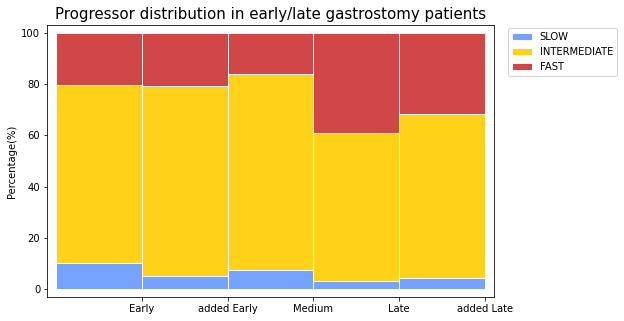

In [22]:
f, ax = plt.subplots(1, figsize=(8,5))
bar_width = 1
bar_l = [i for i in range(len(df['slow']))] 
tick_pos = [i+(bar_width/2) for i in bar_l] 

totals = [i+j+k for i,j,k in zip(df['slow'], df['intermediate'], df['fast'])]
slow_rel = [i / j * 100 for  i,j in zip(df['slow'], totals)]
intm_rel = [i / j * 100 for  i,j in zip(df['intermediate'], totals)]
fast_rel = [i / j * 100 for  i,j in zip(df['fast'], totals)]


ax.bar(bar_l, slow_rel, label='SLOW', alpha=0.9, color='#6699FF',width=bar_width, edgecolor='white')
ax.bar(bar_l, intm_rel, bottom=slow_rel, label='INTERMEDIATE', alpha=0.9, color='#FFCC00', width=bar_width,edgecolor='white')
ax.bar(bar_l, fast_rel, bottom=[i+j for i,j in zip(slow_rel, intm_rel)], label='FAST',alpha=0.9, color='#CC3333', width=bar_width, edgecolor='white')

plt.xticks(tick_pos, df['grouptype'])
ax.set_ylabel("Percentage(%)")
ax.set_xlabel("")

plt.xlim([min(tick_pos)-1.1, max(tick_pos)+0.1])
plt.ylim(-3, 103)

plt.legend(bbox_to_anchor=(1.02, 1.008), loc='upper left')
plt.title('Progressor distribution in early/late gastrostomy patients', fontsize=15)
plt.show()

2. 그룹별 early, late 의 Kaplan 곡선

In [23]:
early_slow_list = list(feature_early_slow['SubjectID'])
early_intermediate_list = list(feature_early_intermediate['SubjectID'])
early_fast_list = list(feature_early_fast['SubjectID'])

add_early_slow_list = list(feature_add_early_slow['SubjectID'])
add_early_intermediate_list = list(feature_add_early_intermediate['SubjectID'])
add_early_fast_list = list(feature_add_early_fast['SubjectID'])

medium_slow_list = list(feature_medium_slow['SubjectID'])
medium_intermediate_list = list(feature_medium_intermediate['SubjectID'])
medium_fast_list = list(feature_medium_fast['SubjectID'])

late_slow_list = list(feature_late_slow['SubjectID'])
late_intermediate_list = list(feature_late_intermediate['SubjectID'])
late_fast_list = list(feature_late_fast['SubjectID'])

add_late_slow_list = list(feature_add_late_slow['SubjectID'])
add_late_intermediate_list = list(feature_add_late_intermediate['SubjectID'])
add_late_fast_list = list(feature_add_late_fast['SubjectID'])

In [24]:
surv_early_slow = surv.copy()
surv_medium_slow = surv.copy()
surv_late_slow = surv.copy()

surv_early_slow.query("SubjectID == {0}".format(early_slow_list), inplace=True)
surv_medium_slow.query("SubjectID == {0}".format(medium_slow_list), inplace=True)
surv_late_slow.query("SubjectID == {0}".format(late_slow_list), inplace=True)

0.0933258606495144 of p value


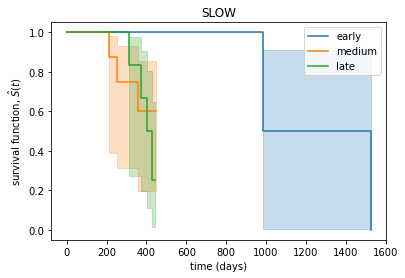

In [25]:
kmf = KaplanMeierFitter()
kmf.fit(surv_early_slow["time_event"], surv_early_slow["status"], label="early")
ax_kmf = kmf.plot()
kmf.fit(surv_medium_slow["time_event"], surv_medium_slow["status"], label="medium")
ax_kmf = kmf.plot(ax=ax_kmf)
kmf.fit(surv_late_slow["time_event"], surv_late_slow["status"], label="late")
ax_kmf = kmf.plot(ax=ax_kmf)

ax_kmf.set_xlabel('time (days)')
ax_kmf.set_ylabel('survival function, $\hat{S}(t)$')
plt.title('SLOW')
ax_kmf
print(str(logrank_test(surv_early_slow["time_event"], surv_late_slow["time_event"], surv_early_slow["status"], surv_late_slow["status"]).p_value)+" of p value")

In [26]:
surv_add_early_slow = surv.copy()
surv_add_late_slow = surv.copy()

surv_add_early_slow.query("SubjectID == {0}".format(add_early_slow_list), inplace=True)
surv_add_late_slow.query("SubjectID == {0}".format(add_late_slow_list), inplace=True)

0.1413737521986451 of p value


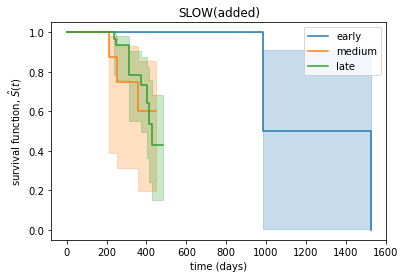

In [27]:
kmf = KaplanMeierFitter()
kmf.fit(surv_add_early_slow["time_event"], surv_add_early_slow["status"], label="early")
ax_kmf = kmf.plot()
kmf.fit(surv_medium_slow["time_event"], surv_medium_slow["status"], label="medium")
ax_kmf = kmf.plot(ax=ax_kmf)
kmf.fit(surv_add_late_slow["time_event"], surv_add_late_slow["status"], label="late")
ax_kmf = kmf.plot(ax=ax_kmf)

ax_kmf.set_xlabel('time (days)')
ax_kmf.set_ylabel('survival function, $\hat{S}(t)$')
plt.title('SLOW(added)')
ax_kmf
print(str(logrank_test(surv_add_early_slow["time_event"], surv_add_late_slow["time_event"], surv_add_early_slow["status"], surv_add_late_slow["status"]).p_value)+" of p value")

In [28]:
surv_early_intermediate = surv.copy()
surv_medium_intermediate = surv.copy()
surv_late_intermediate = surv.copy()

surv_early_intermediate.query("SubjectID == {0}".format(early_intermediate_list), inplace=True)
surv_medium_intermediate.query("SubjectID == {0}".format(medium_intermediate_list), inplace=True)
surv_late_intermediate.query("SubjectID == {0}".format(late_intermediate_list), inplace=True)

0.13750976030599152 of p value


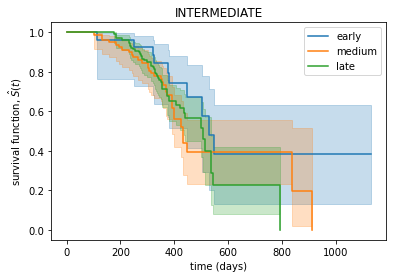

In [29]:
kmf = KaplanMeierFitter()
kmf.fit(surv_early_intermediate["time_event"], surv_early_intermediate["status"], label="early")
ax_kmf = kmf.plot()
kmf.fit(surv_medium_intermediate["time_event"], surv_medium_intermediate["status"], label="medium")
ax_kmf = kmf.plot(ax=ax_kmf)
kmf.fit(surv_late_intermediate["time_event"], surv_late_intermediate["status"], label="late")
ax_kmf = kmf.plot(ax=ax_kmf)

ax_kmf.set_xlabel('time (days)')
ax_kmf.set_ylabel('survival function, $\hat{S}(t)$')
plt.title('INTERMEDIATE')
ax_kmf
print(str(logrank_test(surv_early_intermediate["time_event"], surv_late_intermediate["time_event"], surv_early_intermediate["status"], surv_late_intermediate["status"]).p_value)+" of p value")

In [30]:
surv_early_fast = surv.copy()
surv_medium_fast = surv.copy()
surv_late_fast = surv.copy()

surv_early_fast.query("SubjectID == {0}".format(early_fast_list), inplace=True)
surv_medium_fast.query("SubjectID == {0}".format(medium_fast_list), inplace=True)
surv_late_fast.query("SubjectID == {0}".format(late_fast_list), inplace=True)

0.14567165479433947 of p value


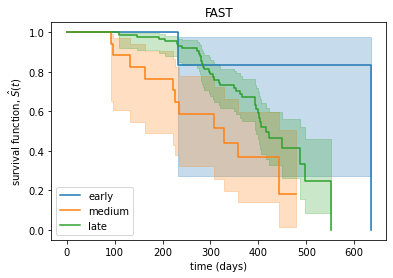

In [31]:
kmf = KaplanMeierFitter()
kmf.fit(surv_early_fast["time_event"], surv_early_fast["status"], label="early")
ax_kmf = kmf.plot()
kmf.fit(surv_medium_fast["time_event"], surv_medium_fast["status"], label="medium")
ax_kmf = kmf.plot(ax=ax_kmf)
kmf.fit(surv_late_fast["time_event"], surv_late_fast["status"], label="late")
ax_kmf = kmf.plot(ax=ax_kmf)

ax_kmf.set_xlabel('time (days)')
ax_kmf.set_ylabel('survival function, $\hat{S}(t)$')
plt.title('FAST')
ax_kmf
print(str(logrank_test(surv_early_fast["time_event"], surv_late_fast["time_event"], surv_early_fast["status"], surv_late_fast["status"]).p_value)+" of p value")

In [32]:
surv_add_early_fast = surv.copy()
surv_add_late_fast = surv.copy()

surv_add_early_fast.query("SubjectID == {0}".format(add_early_fast_list), inplace=True)
surv_add_late_fast.query("SubjectID == {0}".format(add_late_fast_list), inplace=True)

0.036738589754523654 of p value


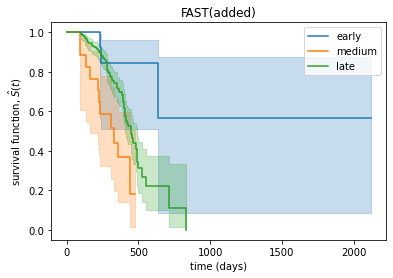

In [33]:
kmf = KaplanMeierFitter()
kmf.fit(surv_add_early_fast["time_event"], surv_add_early_fast["status"], label="early")
ax_kmf = kmf.plot()
kmf.fit(surv_medium_fast["time_event"], surv_medium_fast["status"], label="medium")
ax_kmf = kmf.plot(ax=ax_kmf)
kmf.fit(surv_add_late_fast["time_event"], surv_add_late_fast["status"], label="late")
ax_kmf = kmf.plot(ax=ax_kmf)

ax_kmf.set_xlabel('time (days)')
ax_kmf.set_ylabel('survival function, $\hat{S}(t)$')
plt.title('FAST(added)')
ax_kmf
print(str(logrank_test(surv_add_early_fast["time_event"], surv_add_late_fast["time_event"], surv_add_early_fast["status"], surv_add_late_fast["status"]).p_value)+" of p value")

3. Cox 다변량 분석

In [34]:
survival=surv.copy()
feature_surv = feature.merge(survival, on='SubjectID', how='inner')

In [35]:
feature_surv_early_slow = feature_surv.copy()
feature_surv_early_slow.query("SubjectID == {0}".format(early_slow_list), inplace=True)
feature_surv_early_slow['delayed_gas'] = 0 

feature_surv_late_slow = feature_surv.copy()
feature_surv_late_slow.query("SubjectID == {0}".format(late_slow_list), inplace=True)
feature_surv_late_slow['delayed_gas'] = 1


feature_surv_add_early_slow = feature_surv.copy()
feature_surv_add_early_slow.query("SubjectID == {0}".format(add_early_slow_list), inplace=True)
feature_surv_add_early_slow['delayed_gas'] = 0 

feature_surv_add_late_slow = feature_surv.copy()
feature_surv_add_late_slow.query("SubjectID == {0}".format(add_late_slow_list), inplace=True)
feature_surv_add_late_slow['delayed_gas'] = 1


feature_surv_early_intermediate = feature_surv.copy()
feature_surv_early_intermediate.query("SubjectID == {0}".format(early_intermediate_list), inplace=True)
feature_surv_early_intermediate['delayed_gas'] = 0 

feature_surv_late_intermediate = feature_surv.copy()
feature_surv_late_intermediate.query("SubjectID == {0}".format(late_intermediate_list), inplace=True)
feature_surv_late_intermediate['delayed_gas'] = 1


feature_surv_early_fast = feature_surv.copy()
feature_surv_early_fast.query("SubjectID == {0}".format(early_fast_list), inplace=True)
feature_surv_early_fast['delayed_gas'] = 0 

feature_surv_late_fast = feature_surv.copy()
feature_surv_late_fast.query("SubjectID == {0}".format(late_fast_list), inplace=True)
feature_surv_late_fast['delayed_gas'] = 1


feature_surv_add_early_fast = feature_surv.copy()
feature_surv_add_early_fast.query("SubjectID == {0}".format(add_early_fast_list), inplace=True)
feature_surv_add_early_fast['delayed_gas'] = 0 

feature_surv_add_late_fast = feature_surv.copy()
feature_surv_add_late_fast.query("SubjectID == {0}".format(add_late_fast_list), inplace=True)
feature_surv_add_late_fast['delayed_gas'] = 1

In [36]:
feature_surv_slow = pd.concat([feature_surv_early_slow, feature_surv_late_slow])
feature_surv_add_slow = pd.concat([feature_surv_add_early_slow, feature_surv_add_late_slow])
feature_surv_intermediate = pd.concat([feature_surv_early_intermediate, feature_surv_late_intermediate])
feature_surv_fast = pd.concat([feature_surv_early_fast, feature_surv_late_fast])
feature_surv_add_fast = pd.concat([feature_surv_add_early_fast, feature_surv_add_late_fast])

In [37]:
feat_list = ['Age', 'Gender', 'onset_site', 'onset_delta',
       'diag_minus_onset', 'slope_alsfrs_tot',
       'fvc_slope', 'fvc_mean',  'mean_Q10_Respiratory',
       'mean_Bulbar', 'mean_motor', 'slope_Q1_Speech', 'slope_Q2_Salivation',
       'slope_Q3_Swallowing', 'slope_Q4_Handwriting', 'slope_Q5_Cutting',
       'slope_Q6_Dressing_and_Hygiene', 'slope_Q7_Turning_in_Bed',
       'slope_Q8_Walking', 'slope_Q9_Climbing_Stairs', 'delayed_gas','slope_Q10_Respiratory','time_event','status']

In [38]:
feature_surv_slow = feature_surv_slow[feat_list]
feature_surv_add_slow = feature_surv_add_slow[feat_list]
feature_surv_intermediate = feature_surv_intermediate[feat_list]
feature_surv_fast = feature_surv_fast[feat_list]
feature_surv_add_fast = feature_surv_add_fast[feat_list]

In [39]:
from lifelines import CoxPHFitter
cph = CoxPHFitter(penalizer=0.01)
cph.fit(feature_surv_slow, 'time_event', event_col='status')
cph.print_summary()

C:\Users\hyji1\anaconda3\lib\site-packages\lifelines\utils\__init__.py:1090: ConvergenceWarning: Column(s) ['slope_Q1_Speech', 'slope_Q2_Salivation', 'slope_Q3_Swallowing', 'slope_Q4_Handwriting', 'slope_Q5_Cutting', 'slope_Q6_Dressing_and_Hygiene', 'slope_Q8_Walking'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


<lifelines.CoxPHFitter: fitted with 11 total observations, 5 right-censored observations>
             duration col = 'time_event'
                event col = 'status'
                penalizer = 0.01
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 11
number of events observed = 6
   partial log-likelihood = -0.76
         time fit was run = 2021-07-14 14:19:49 UTC

---
                                 coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                              
Age                              0.06       1.06       0.22            -0.38             0.49                 0.69                 1.63
Gender                           1.90       6.67       6.51           -10.86            14.66                 0.00             2.32e+06
onset_site                      -0.70       0.50       5.23           -10.95             9.55                 0.00             14060.16
onset_delta                     -0.00       1.00       0.01            -0.02             0.01                 0.98                 1.01
diag_minus_onset                 0.00       1.00       0.01            -0.01             0.02                 0.99                 1.02
slope_alsfrs_tot                -7.54       0.00      56.06          -117.42           102.35                 0.00             2.81e+44
fvc_slope                        0.22       1.25       8.71           -16.86            17.30                 0.00             3.26e+07
fvc_mean                         0.01       1.01       0.14            -0.26             0.28                 0.77                 1.32
mean_Q10_Respiratory            -0.62       0.54       3.92            -8.31             7.07                 0.00              1180.02
mean_Bulbar                      0.42       1.52       3.30            -6.04             6.88                 0.00               972.09
mean_motor                      -0.03       0.97       0.47            -0.95             0.88                 0.39                 2.41
slope_Q1_Speech                143.87   3.02e+62     264.12          -373.80           661.53                 0.00            1.99e+287
slope_Q2_Salivation            -55.51       0.00     317.08          -676.98           565.96                 0.00            6.24e+245
slope_Q3_Swallowing           -135.13       0.00     359.24          -839.22           568.97                 0.00            1.26e+247
slope_Q4_Handwriting            30.17   1.27e+13     275.31          -509.42           569.76                 0.00            2.79e+247
slope_Q5_Cutting               -33.97       0.00     240.29          -504.93           437.00                 0.00            6.11e+189
slope_Q6_Dressing_and_Hygiene -144.95       0.00     363.21          -856.83           566.93                 0.00                  inf
slope_Q7_Turning_in_Bed        -39.09       0.00     124.50          -283.10           204.92                 0.00             9.86e+88
slope_Q8_Walking               -78.60       0.00     275.88          -619.31           462.12                 0.00            4.95e+200
slope_Q9_Climbing_Stairs         3.27      26.43     155.16          -300.84           307.39                 0.00            3.13e+133
delayed_gas                      1.70       5.50       5.17            -8.44            11.85                 0.00             1.40e+05
slope_Q10_Respiratory           24.33   3.70e+10     171.42          -311.64           360.31                 0.00            3.03e+156

                                  z    p   -log2(p)
covariate                                          
Age                            0.25 0.80       0.32
Gender                         0.29 0.77       0.38
onset_site                    -0.13 0.89       0.16
onset_delta                   -0.11 0.91       0.13
di

In [40]:
cph.fit(feature_surv_add_slow, 'time_event', event_col='status')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 38 total observations, 27 right-censored observations>
             duration col = 'time_event'
                event col = 'status'
                penalizer = 0.01
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 38
number of events observed = 11
   partial log-likelihood = -11.75
         time fit was run = 2021-07-14 14:19:49 UTC

---
                                coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                             
Age                             0.10       1.11       0.07            -0.04             0.24                 0.96                 1.27
Gender                          3.60      36.58       2.06            -0.43             7.63                 0.65              2066.87
onset_site                     -1.92       0.15       1.75            -5.35             1.51                 0.00                 4.53
onset_delta                     0.00       1.00       0.00            -0.00             0.01                 1.00                 1.01
diag_minus_onset                0.00       1.00       0.00            -0.00             0.01                 1.00                 1.01
slope_alsfrs_tot               -4.51       0.01      16.61           -37.06            28.04                 0.00             1.51e+12
fvc_slope                      -0.18       0.84       2.54            -5.16             4.80                 0.01               121.80
fvc_mean                        0.02       1.02       0.05            -0.08             0.12                 0.92                 1.13
mean_Q10_Respiratory            0.66       1.93       1.36            -2.01             3.33                 0.13                27.82
mean_Bulbar                     2.25       9.51       1.30            -0.29             4.80                 0.75               120.97
mean_motor                     -0.09       0.91       0.20            -0.48             0.30                 0.62                 1.35
slope_Q1_Speech               -64.56       0.00      62.11          -186.28            57.17                 0.00             6.74e+24
slope_Q2_Salivation           -66.19       0.00      53.39          -170.83            38.45                 0.00             4.98e+16
slope_Q3_Swallowing            17.79   5.32e+07      29.32           -39.68            75.26                 0.00             4.84e+32
slope_Q4_Handwriting           51.92   3.53e+22      43.32           -32.99           136.83                 0.00             2.65e+59
slope_Q5_Cutting              -20.49       0.00      43.41          -105.57            64.60                 0.00             1.14e+28
slope_Q6_Dressing_and_Hygiene -33.62       0.00      47.04          -125.82            58.58                 0.00             2.75e+25
slope_Q7_Turning_in_Bed       -16.74       0.00      30.20           -75.92            42.44                 0.00             2.71e+18
slope_Q8_Walking              -42.76       0.00      73.24          -186.30           100.78                 0.00             5.87e+43
slope_Q9_Climbing_Stairs       22.11   4.02e+09      28.53           -33.81            78.04                 0.00             7.79e+33
delayed_gas                     3.73      41.75       3.37            -2.88            10.34                 0.06             31009.22
slope_Q10_Respiratory         -34.42       0.00      44.61          -121.85            53.00                 0.00             1.04e+23

                                  z    p   -log2(p)
covariate                                          
Age                            1.38 0.17       2.58
Gender                         1.75 0.08       3.64
onset_site                    -1.10 0.27       1.87
onset_delta                    0.46 0.65       0.63
diag_minus_onset       

In [43]:
cph2 = CoxPHFitter()
cph2.fit(feature_surv_intermediate, 'time_event', event_col='status')
cph2.print_summary()

C:\Users\hyji1\anaconda3\lib\site-packages\lifelines\utils\__init__.py:1090: ConvergenceWarning: Column(s) ['slope_Q3_Swallowing'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


ConvergenceError: Convergence halted due to matrix inversion problems. Suspicion is high collinearity. Please see the following tips in the lifelines documentation: https://lifelines.readthedocs.io/en/latest/Examples.html#problems-with-convergence-in-the-cox-proportional-hazard-modelMatrix is singular.

In [41]:
cph.fit(feature_surv_fast, 'time_event', event_col='status')
cph.print_summary()

C:\Users\hyji1\anaconda3\lib\site-packages\lifelines\utils\__init__.py:1090: ConvergenceWarning: Column(s) ['slope_Q6_Dressing_and_Hygiene'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


<lifelines.CoxPHFitter: fitted with 94 total observations, 54 right-censored observations>
             duration col = 'time_event'
                event col = 'status'
                penalizer = 0.01
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 94
number of events observed = 40
   partial log-likelihood = -127.77
         time fit was run = 2021-07-14 14:19:50 UTC

---
                                coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                             
Age                             0.04       1.04       0.02            -0.00             0.08                 1.00                 1.08
Gender                          1.12       3.06       0.41             0.31             1.93                 1.36                 6.88
onset_site                     -1.34       0.26       0.64            -2.59            -0.08                 0.08                 0.92
onset_delta                    -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
diag_minus_onset                0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
slope_alsfrs_tot               -2.88       0.06       4.86           -12.40             6.64                 0.00               762.59
fvc_slope                       1.14       3.13       0.80            -0.44             2.72                 0.65                15.13
fvc_mean                       -0.02       0.99       0.01            -0.04             0.01                 0.96                 1.01
mean_Q10_Respiratory            0.71       2.04       0.35             0.04             1.39                 1.04                 4.02
mean_Bulbar                    -0.23       0.79       0.19            -0.61             0.14                 0.54                 1.15
mean_motor                     -0.01       0.99       0.05            -0.10             0.09                 0.90                 1.09
slope_Q1_Speech                -6.77       0.00      10.38           -27.11            13.58                 0.00             7.89e+05
slope_Q2_Salivation            20.18   5.81e+08      15.60           -10.39            50.75                 0.00             1.10e+22
slope_Q3_Swallowing           -11.05       0.00      16.35           -43.09            20.98                 0.00             1.30e+09
slope_Q4_Handwriting           -4.64       0.01      17.06           -38.07            28.79                 0.00             3.17e+12
slope_Q5_Cutting              -32.15       0.00      22.56           -76.37            12.06                 0.00             1.73e+05
slope_Q6_Dressing_and_Hygiene  15.32   4.49e+06      25.40           -34.47            65.11                 0.00             1.89e+28
slope_Q7_Turning_in_Bed        14.02   1.23e+06      20.31           -25.78            53.82                 0.00             2.38e+23
slope_Q8_Walking               23.71   1.98e+10      19.45           -14.42            61.83                 0.00             7.15e+26
slope_Q9_Climbing_Stairs      -26.96       0.00      15.91           -58.15             4.22                 0.00                67.81
delayed_gas                     0.24       1.28       1.10            -1.92             2.40                 0.15                11.08
slope_Q10_Respiratory          22.05   3.76e+09      15.04            -7.43            51.53                 0.00             2.39e+22

                                  z    p   -log2(p)
covariate                                          
Age                            1.77 0.08       3.71
Gender                         2.70 0.01       7.16
onset_site                    -2.09 0.04       4.77
onset_delta                   -0.35 0.73       0.46
diag_minus_onset      

In [42]:
cph.fit(feature_surv_add_fast, 'time_event', event_col='status')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 252 total observations, 161 right-censored observations>
             duration col = 'time_event'
                event col = 'status'
                penalizer = 0.01
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 252
number of events observed = 91
   partial log-likelihood = -383.95
         time fit was run = 2021-07-14 14:19:50 UTC

---
                                coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                             
Age                             0.04       1.04       0.01             0.02             0.07                 1.02                 1.07
Gender                          0.45       1.57       0.24            -0.01             0.92                 0.99                 2.50
onset_site                     -0.70       0.50       0.37            -1.41             0.02                 0.24                 1.02
onset_delta                    -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
diag_minus_onset                0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
slope_alsfrs_tot               -5.11       0.01       3.98           -12.92             2.70                 0.00                14.83
fvc_slope                      -0.08       0.93       0.45            -0.96             0.80                 0.38                 2.24
fvc_mean                       -0.01       0.99       0.01            -0.02             0.01                 0.98                 1.01
mean_Q10_Respiratory            0.14       1.15       0.18            -0.22             0.50                 0.81                 1.64
mean_Bulbar                    -0.17       0.84       0.11            -0.39             0.04                 0.68                 1.05
mean_motor                     -0.06       0.94       0.03            -0.11            -0.01                 0.89                 0.99
slope_Q1_Speech               -10.29       0.00       9.02           -27.97             7.39                 0.00              1615.61
slope_Q2_Salivation             4.41      82.56       9.45           -14.11            22.93                 0.00             9.11e+09
slope_Q3_Swallowing            17.62   4.50e+07       9.89            -1.77            37.01                 0.17             1.19e+16
slope_Q4_Handwriting           17.77   5.24e+07       9.39            -0.63            36.18                 0.53             5.16e+15
slope_Q5_Cutting              -20.81       0.00       8.61           -37.69            -3.92                 0.00                 0.02
slope_Q6_Dressing_and_Hygiene  -3.36       0.03      13.06           -28.95            22.23                 0.00             4.52e+09
slope_Q7_Turning_in_Bed         9.61   14940.15       9.73            -9.46            28.69                 0.00             2.87e+12
slope_Q8_Walking                8.70    5999.10      13.82           -18.39            35.79                 0.00             3.49e+15
slope_Q9_Climbing_Stairs       -6.11       0.00       8.68           -23.12            10.89                 0.00             53660.37
delayed_gas                     1.35       3.84       0.68             0.02             2.67                 1.02                14.47
slope_Q10_Respiratory           6.05     423.69       8.85           -11.30            23.40                 0.00             1.45e+10

                                  z      p   -log2(p)
covariate                                            
Age                            3.40 <0.005      10.52
Gender                         1.90   0.06       4.12
onset_site                    -1.91   0.06       4.17
onset_delta                   -0.26   0.79       0.33
diag_mi